# Mean temperatures have been significantly higher in the last 3 decades as compared to previous decades

This notebook explores the temperature changes in the last decades

In [97]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import sem
from scipy.stats import linregress
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [98]:
# Read data and set year column as the index

sunshine = pd.read_csv("Mean Temperature.csv", na_values='---')
sunshine.set_index(sunshine.columns[0], inplace=True)
sunshine.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.6,3.3,NaN,6.98,14.11,8.62,8.48
1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28


In [99]:
# Create appropriate dataframes and lists for further data analysis


# Create 2 data frames:
# sunshine_1_df contains the data from 1884-1959; sunshine_2_df contains data from 1960 to 2023

start_year = sunshine.index.min()
end_year = sunshine.index.max()

sunshine_1_df = sunshine.loc[start_year:1959]
sunshine_2_df = sunshine.loc[1960:end_year]


# Obtain lists of sunshine data and years

sunshine_1 = sunshine_1_df["ann"].tolist()
sunshine_1_year = sunshine_1_df.index.values.tolist()


sunshine_2 = sunshine_2_df["ann"].tolist()
sunshine_2_year = sunshine_2_df.index.values.tolist()

sunshine_2.pop() # pop last value as NaN value
sunshine_2_year.pop()


# Turn lists into numpy arrays

sunshine_1 = np.array(sunshine_1)
sunshine_1_year = np.array(sunshine_1_year)

sunshine_2 = np.array(sunshine_2)
sunshine_2_year = np.array(sunshine_2_year)


R^2 and equation for line 1: 
R^2: 0.201
Equation: y = 0.00983x + -10.665

R^2 and equation for line 2: 
R^2: 0.536
Equation: y = 0.02548x + -41.984



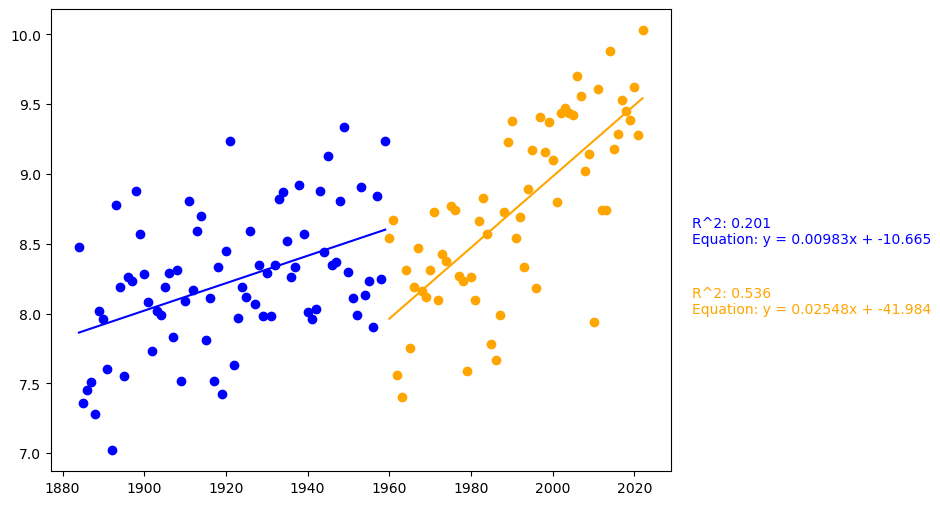

In [100]:
# Linear regression and data plotting


# Linear regresion for both data sets

slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(sunshine_1_year, sunshine_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(sunshine_2_year, sunshine_2)


# Create strings for equation and R^2 value

text_1 = "R^2: " + str(round(r_value_1 * r_value_1, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_1, 5)) + "x + " + str(round(intercept_1, 3))
text_2 = "R^2: " + str(round(r_value_2 * r_value_2, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_2, 5)) + "x + " + str(round(intercept_2, 3))

print("R^2 and equation for line 1: \n", text_1, sep = "")
print("\nR^2 and equation for line 2: \n", text_2, "\n", sep = "")


# Plot data

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(sunshine_1_year, sunshine_1, color = "blue")
plt.scatter(sunshine_2_year, sunshine_2, color = "orange")

plt.plot(sunshine_1_year, slope_1 * sunshine_1_year + intercept_1, color = "blue")
plt.plot(sunshine_2_year, slope_2 * sunshine_2_year + intercept_2, color = "orange")

plt.text(2034, 8.5, text_1, color = "blue")
plt.text(2034, 8, text_2, color = "orange")

plt.show()


In [104]:
# Perform statistics on data by decade


# Extract data for each complete decade (i.e. any decade that has 10 values)

decades_data = []

for decade in range(1890, 2020, 10):
    start_year = decade
    end_year = decade + 9
    decade_data = sunshine.loc[(sunshine.index >= start_year) & (sunshine.index <= end_year), 'ann'].tolist()
    decades_data.append(decade_data)
    
# Perform ANOVA

ANOVA = f_oneway(*decades_data)
print("\n\033[4mANOVA Results:\033[0m\n", "ANOVA Statistic: ", ANOVA.statistic, "\nANOVA p-value: ", ANOVA.pvalue, "\n\n", sep = "")

# Perform Tukey posthoc

flat_data = np.concatenate(decades_data)
group_labels = np.concatenate([[i] * len(decades_data[i]) for i in range(len(decades_data))])

tukey_posthoc = pairwise_tukeyhsd(flat_data, group_labels)
print("\033[4mTukey Posthoc Test Results:\033[0m\n", tukey_posthoc, sep = "")


ANOVA Results:
ANOVA Statistic: 8.72347045848203
ANOVA p-value: 1.0987405125299074e-11


Tukey Posthoc Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    -0.08    1.0 -0.7459 0.5859  False
     0      2    0.051    1.0 -0.6149 0.7169  False
     0      3    0.155 0.9999 -0.5109 0.8209  False
     0      4    0.387 0.7524 -0.2789 1.0529  False
     0      5    0.428 0.6117 -0.2379 1.0939  False
     0      6    0.286 0.9632 -0.3799 0.9519  False
     0      7    0.013    1.0 -0.6529 0.6789  False
     0      8    0.251 0.9871 -0.4149 0.9169  False
     0      9    0.278 0.9704 -0.3879 0.9439  False
     0     10    0.808 0.0048  0.1421 1.4739   True
     0     11    1.205    0.0  0.5391 1.8709   True
     0     12    1.071    0.0  0.4051 1.7369   True
     1      2    0.131    1.0 -0.5349 0.7969  False
     1      3    0.235 0.9927 -0.4309 0.9009  Fals

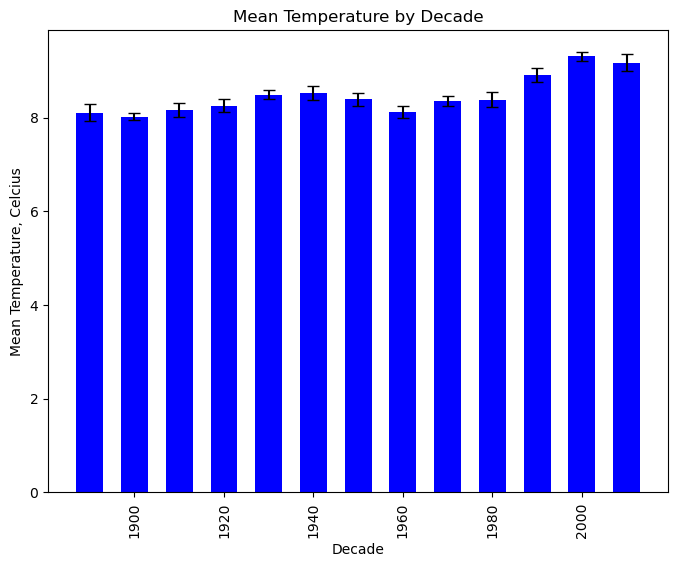

In [105]:
# Plot bar chart of average temperature by decade


# Calculate means and standard errors

temp_means = [np.mean(flat_data[group_labels == group]) for group in np.unique(group_labels)]
temp_SEM = [sem(flat_data[group_labels == group]) for group in np.unique(group_labels)]


# Create new group labels, corresponding to each decade of the data

group_labels_decade = (1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010)
group_labels_decade = np.array(group_labels_decade)


# Plot the bar graph with error bars

figure, ax = plt.subplots(figsize = (8, 6)) 

plt.bar(group_labels_decade, temp_means, yerr = temp_SEM, capsize = 4, color= 'blue', width = 6)
plt.xticks(rotation = 90)
plt.xlabel('Decade')
plt.ylabel('Mean Temperature, Celcius')
plt.title('Mean Temperature by Decade')

plt.show()
